In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#### Attribute Information :
Following is the Data Dictionary for customer's credit card dataset :-

##### CUSTID : Identification of Credit Card holder (Categorical)
##### BALANCE : Balance amount left in their account to make purchases
##### BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
##### PURCHASES : Amount of purchases made from account
##### ONEOFFPURCHASES : Maximum purchase amount done in one-go
##### INSTALLMENTSPURCHASES : Amount of purchase done in installment
##### CASHADVANCE : Cash in advance given by the user
##### PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
##### ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
##### PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
##### CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
##### CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
##### PURCHASESTRX : Numbe of purchase transactions made
##### CREDITLIMIT : Limit of Credit Card for user
##### PAYMENTS : Amount of Payment done by user
##### MINIMUM_PAYMENTS : Minimum amount of payments made by user
##### PRCFULLPAYMENT : Percent of full payment paid by user
##### TENURE : Tenure of credit card service for user

# 1. Loading The Dataset 

In [2]:
df=pd.read_csv('C:\\Users\\91897\\Downloads\\credit_card_dataset.csv')
df.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
6923,C17112,98.935446,0.363636,1002.00,0.00,1002.00,0.0,0.333333,0.000000,0.250000,0.0,0,4,1500.0,1863.921412,171.566972,0.000000,12
1339,C11384,162.905422,0.727273,1600.00,0.00,1600.00,0.0,0.666667,0.000000,0.666667,0.0,0,8,6000.0,2733.152899,156.243291,0.666667,12
8104,C18323,1.846916,0.181818,604.32,0.00,604.32,0.0,1.000000,0.000000,1.000000,0.0,0,12,1500.0,557.734182,12.224702,0.000000,12
5651,C15809,520.521822,1.000000,820.29,820.29,0.00,0.0,0.916667,0.916667,0.000000,0.0,0,11,6000.0,2295.229351,274.668404,0.000000,12
2067,C12133,137.636267,1.000000,1567.25,60.20,1507.05,0.0,1.000000,0.083333,1.000000,0.0,0,232,7000.0,1541.979811,190.253479,1.000000,12


# 2. EDA and Data Cleaning

In [3]:
print('size of data',df.shape)
print('\n')
df.info()

size of data (8950, 18)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-

In [4]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

In [6]:
df.duplicated().any()

False

In [7]:
df.drop(columns=['CUST_ID'],inplace=True)

In [8]:
df.shape

(8950, 17)

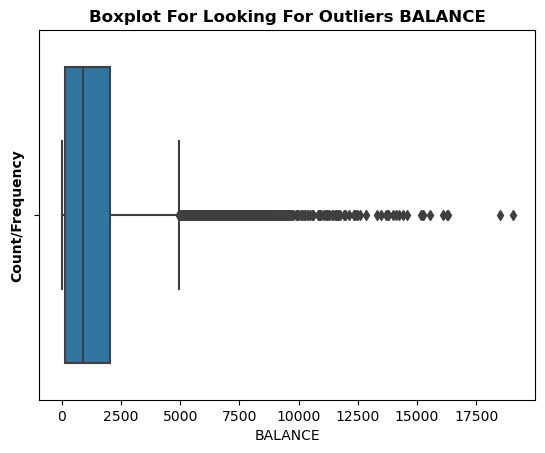

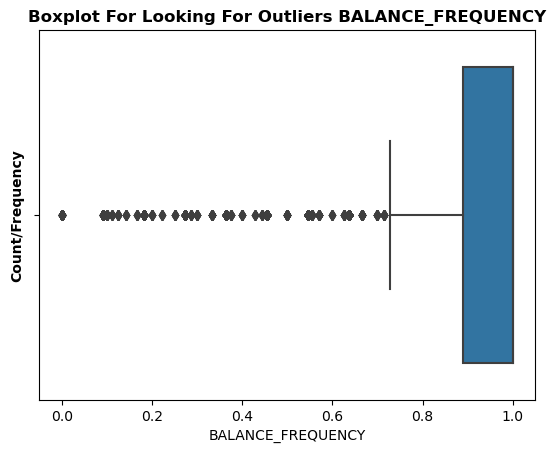

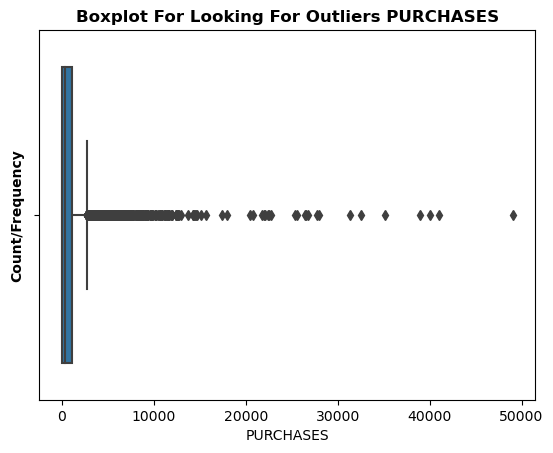

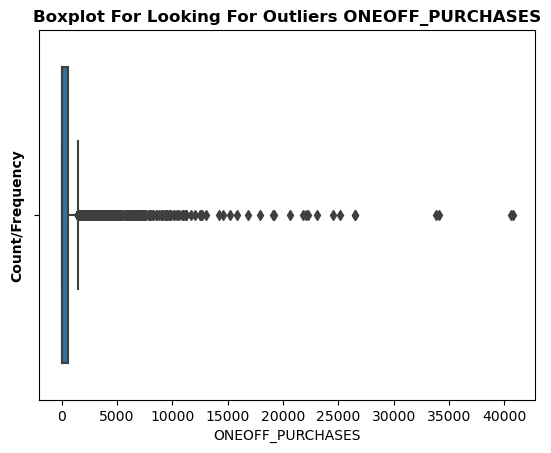

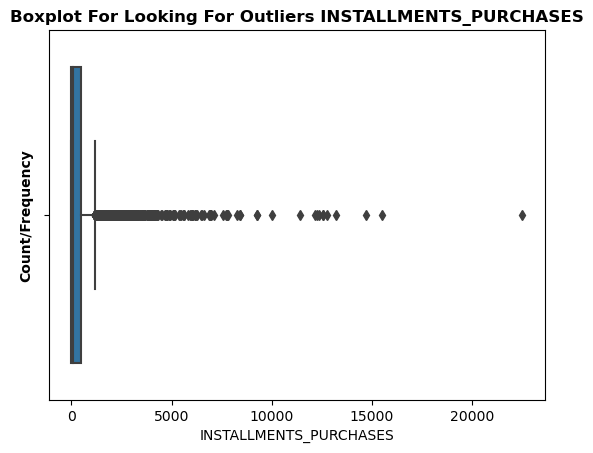

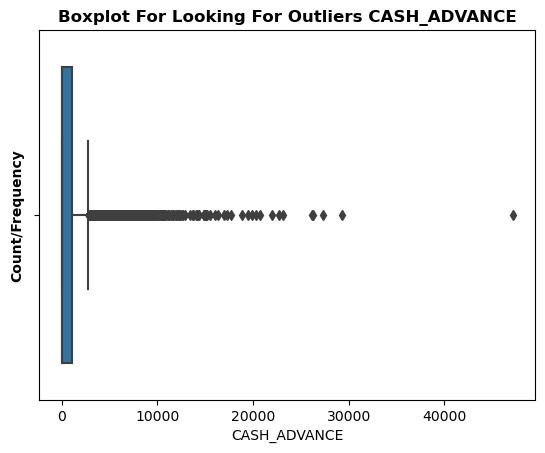

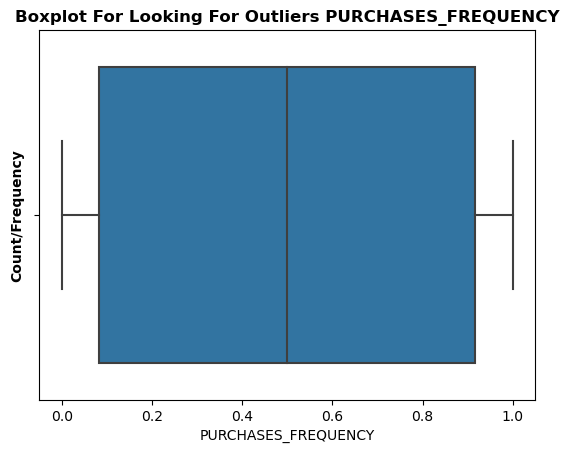

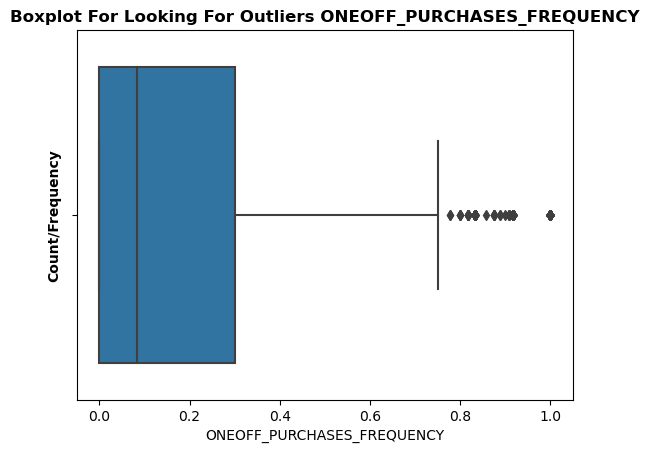

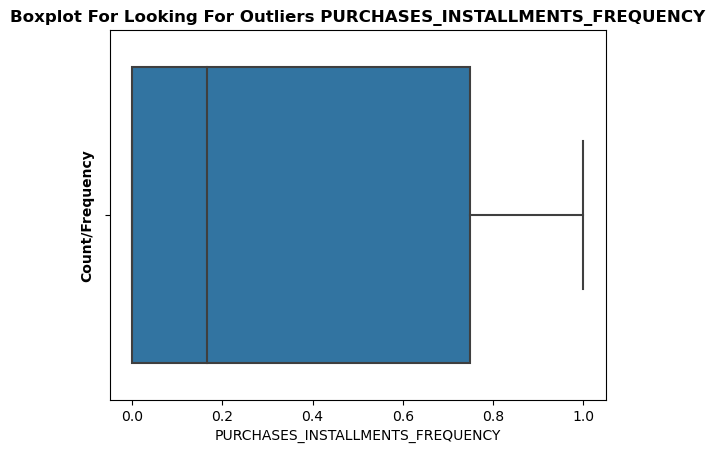

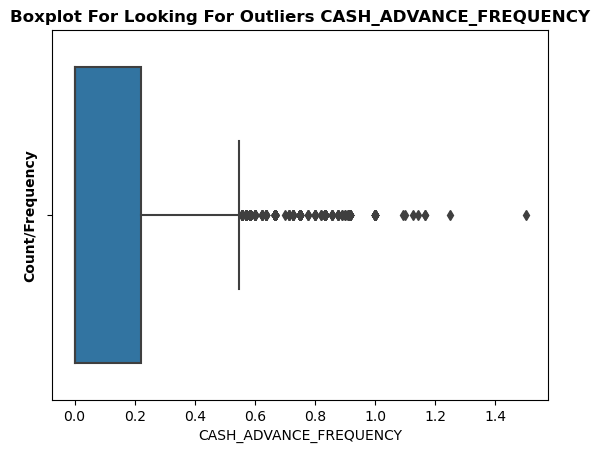

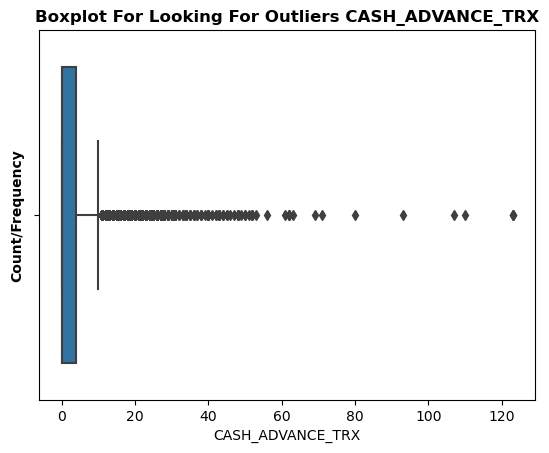

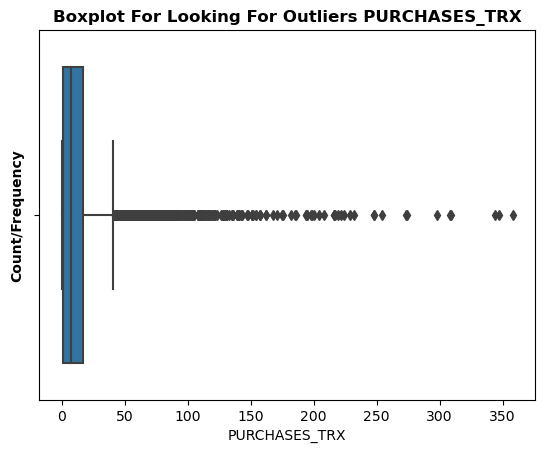

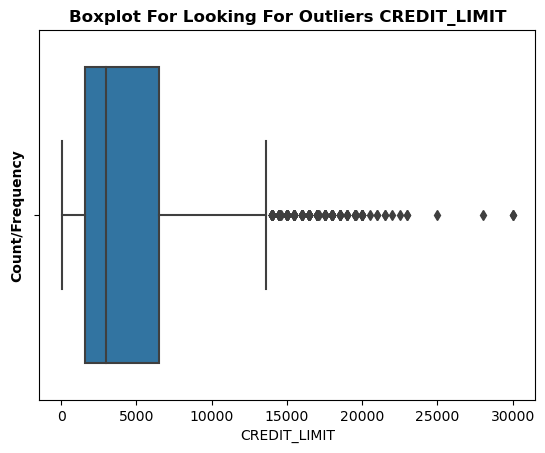

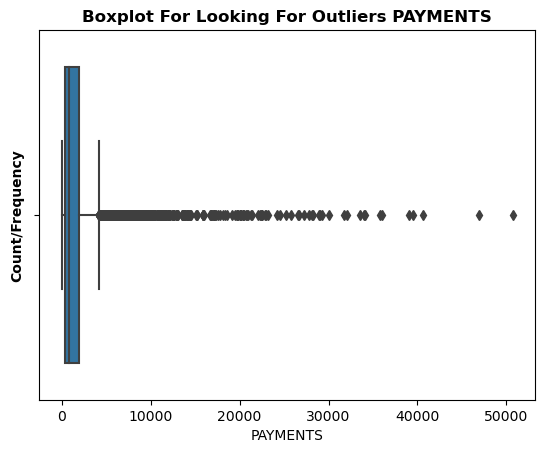

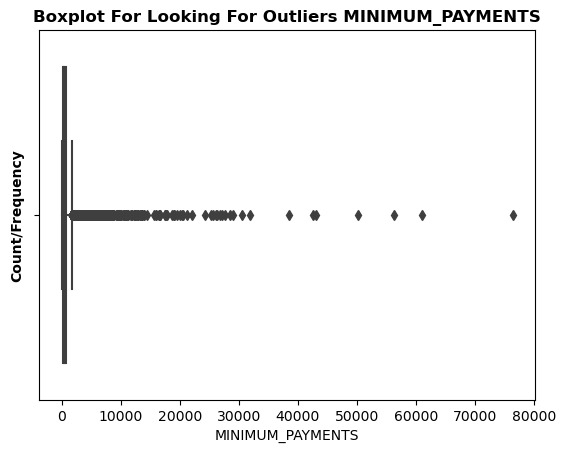

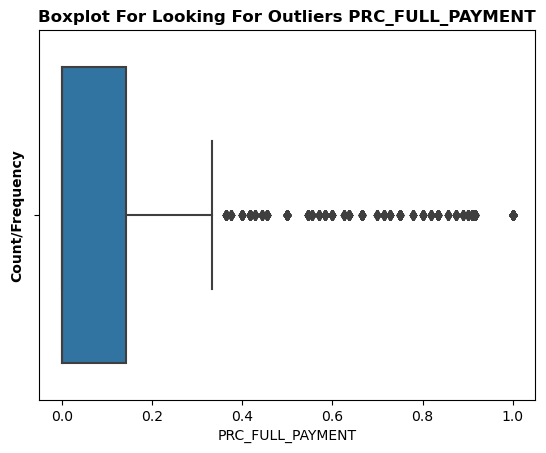

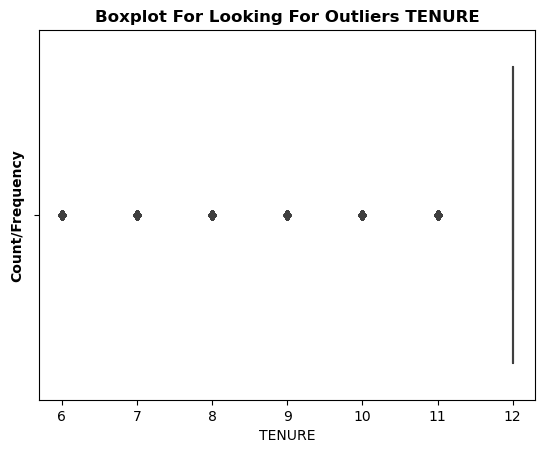

In [9]:
for i in df.select_dtypes(include=['float64','int64']).columns:
    x=i
    data=df
    plt.title(f'Boxplot For Looking For Outliers {i}',fontweight='bold',fontsize='12')
    sns.boxplot(data=data,x=x)
    plt.ylabel('Count/Frequency',fontweight='bold')
    plt.show()

# 3. Detecting Outliers

In [10]:
# find outlier in all columns
for i in df.select_dtypes(include=['float64','int64']).columns:
  max_thresold = df[i].quantile(0.95)
  min_thresold = df[i].quantile(0.05)
  df1 = df[(df[i] < max_thresold) & (df[i] > min_thresold)].shape
  print(" outlier in ",i,"is" ,int(((df.shape[0]-df1[0])/df.shape[0])*100),"%")


 outlier in  BALANCE is 10 %
 outlier in  BALANCE_FREQUENCY is 75 %
 outlier in  PURCHASES is 27 %
 outlier in  ONEOFF_PURCHASES is 53 %
 outlier in  INSTALLMENTS_PURCHASES is 48 %
 outlier in  CASH_ADVANCE is 56 %
 outlier in  PURCHASES_FREQUENCY is 47 %
 outlier in  ONEOFF_PURCHASES_FREQUENCY is 53 %
 outlier in  PURCHASES_INSTALLMENTS_FREQUENCY is 58 %
 outlier in  CASH_ADVANCE_FREQUENCY is 57 %
 outlier in  CASH_ADVANCE_TRX is 56 %
 outlier in  PURCHASES_TRX is 27 %
 outlier in  CREDIT_LIMIT is 14 %
 outlier in  PAYMENTS is 10 %
 outlier in  MINIMUM_PAYMENTS is 10 %
 outlier in  PRC_FULL_PAYMENT is 71 %
 outlier in  TENURE is 91 %


In [11]:
# remove outliers from columns having nearly 10% outlier

max_threshold_BALANCE=df['BALANCE'].quantile(0.95)
min_threshold_BALANCE=df['BALANCE'].quantile(0.05)
max_threshold_CREDIT_LIMIT=df['CREDIT_LIMIT'].quantile(0.95)
min_threshold_CREDIT_LIMIT=df['CREDIT_LIMIT'].quantile(0.05)
max_threshold_PAYMENTS=df['PAYMENTS'].quantile(0.95)
min_threshold_PAYMENTS=df['PAYMENTS'].quantile(0.05) 

In [12]:
df1 = df[(df["CREDIT_LIMIT"] < max_threshold_CREDIT_LIMIT) &
                                         (df["CREDIT_LIMIT"] > min_threshold_CREDIT_LIMIT) & 
                                         (df["BALANCE"] < max_threshold_BALANCE) & 
                                         (df["BALANCE"] > min_threshold_BALANCE) &  
                                         (df["PAYMENTS"] < max_threshold_PAYMENTS) & 
                                         (df["PAYMENTS"] > min_threshold_PAYMENTS)]

In [13]:
# Or indirect method

# df1=df[(df["CREDIT_LIMIT"] < df['CREDIT_LIMIT'].quantile(0.95)) &
 #                                        (df["CREDIT_LIMIT"] > df['CREDIT_LIMIT'].quantile(0.05)) & 
 #                                        (df["BALANCE"] < df['BALANCE'].quantile(0.95)) & 
#                                         (df["BALANCE"] > df['BALANCE'].quantile(0.05)) &  
#                                         (df["PAYMENTS"] < df['PAYMENTS'].quantile(0.95)) & 
#                                         (df["PAYMENTS"] > df['PAYMENTS'].quantile(0.05))]#

In [14]:
df1[["CREDIT_LIMIT",'BALANCE','PAYMENTS']].describe()

,CREDIT_LIMIT,BALANCE,PAYMENTS
count,6466.000000,6466.000000,6466.000000
mean,4048.763314,1342.038946,1319.803988
std,2537.995359,1368.484809,1231.595244
min,1050.000000,8.838114,90.171900
25%,2000.000000,192.969954,454.856894
50%,3000.000000,1008.963491,872.941633
75%,6000.000000,1943.603904,1721.870577
max,11500.000000,5906.184924,6080.457549


In [15]:
print(df1.shape)
print('\n')

df1.head()

(6466, 17)




,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.00,0,12,2300.0,679.065082,532.033990,0.000000,12


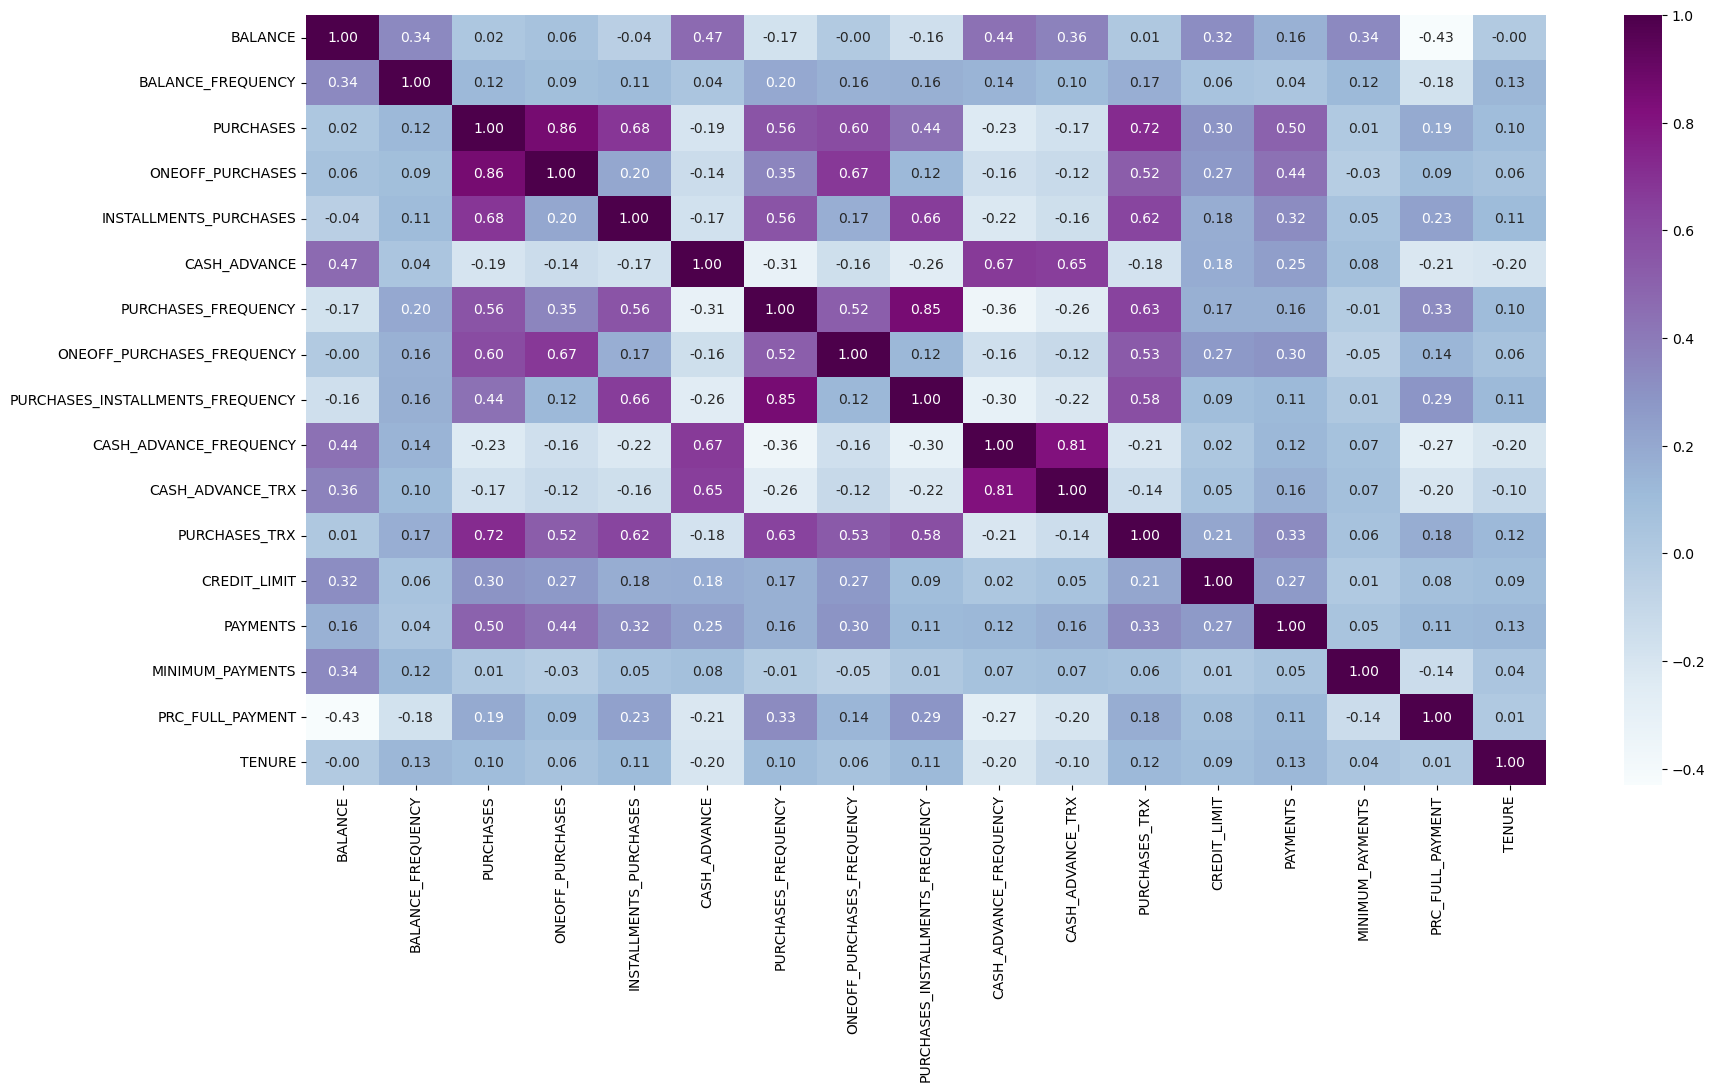

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True,cmap='BuPu',fmt='.2f')
plt.show()

### So we found these features shows the high +ve correlation

1. ONEOFF_PURCHASE & PURCHASES= 0.86
2. PURCHASES_INSTALLMENTS_FREQUENCY & PURCHASES_FREQUENCY= 0.86
3. CASH_ADVANCE_TRX & CASH_ADVANCE_FREQUENCY= 0.86

# 4.Scaling the Data

In [17]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [18]:
df1=scaler.fit_transform(df1)

In [19]:
df1

array([[ 1.35958568, -0.02715353, -0.71136663, ...,  0.18365864,
         0.24802861,  0.33969475],
       [ 0.84268315,  0.48108734, -0.05912009, ..., -0.04851659,
        -0.51957586,  0.33969475],
       [-0.38317207,  0.48108734, -0.69786902, ..., -0.24805471,
        -0.51957586,  0.33969475],
       ...,
       [-0.94653953, -0.45069038, -0.51244565, ..., -0.32906837,
         1.783241  , -4.58327778],
       [-0.96594456, -0.45069038, -0.61814878, ..., -0.341359  ,
         1.20753592, -4.58327778],
       [-0.92315108, -2.31424023, -0.71136663, ..., -0.36437308,
         0.63183085, -4.58327778]])

# 5.Dimensionallity Reduction

###### There are several techniques for dimensionality reduction,

1. Principal component analysis (PCA),
2. Singular value decomposition (SVD),
3. Linear discriminant analysis (LDA).

Note: In this case we gonna use PCA

In [20]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_data=pca.fit_transform(df1)

pca_data

array([[-2.28655168,  3.00371663],
       [ 1.13470975,  0.4319932 ],
       [-1.45810662, -1.49314247],
       ...,
       [-0.146907  , -2.37248912],
       [-0.67727206, -2.3058454 ],
       [-2.50113134, -1.14778567]])

In [21]:
# Converting the pca_data into DataFrame

pca_df=pd.DataFrame(data=pca_data,columns=['pca1','pca2'])
pca_df.head(7)

,pca1,pca2
0,-2.286552,3.003717
1,1.134710,0.431993
2,-1.458107,-1.493142
3,0.740699,-0.539119
4,0.648372,-1.076997
5,-0.101649,-0.581100
6,-0.015239,-0.622943


# 6. HyperParameter Tuning 

This can be done by 2 ways
1. By using KElbowVisualizer Build in Module
2. By Traditional Method

Elbow Method to determine the number of clusters to be formed:


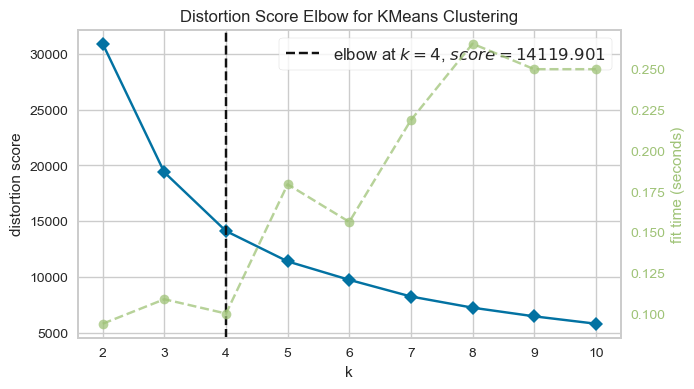

In [22]:
from yellowbrick.cluster import KElbowVisualizer

plt.figure(figsize=(7,4))
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_df)
Elbow_M.show()
plt.show()

##### It shows 4 clusters to be made
    Now lets do same with traditional method

In [23]:
from sklearn.cluster import KMeans,DBSCAN,SpectralClustering,AgglomerativeClustering

inertia = []

for i in range(1,15):
  kmean = KMeans(n_clusters=i)
  kmean.fit_predict(pca_df,sample_weight=None)
  inertia.append(kmean.inertia_)

In [24]:
inertia

[51509.190847935,
 30904.93236380534,
 19383.40832845091,
 14120.868516384795,
 11400.7345540893,
 9746.354732218448,
 8253.591600486332,
 7253.2318430680425,
 6477.906545583128,
 5814.280826901827,
 5334.332621592088,
 4912.403316141901,
 4562.389581252359,
 4198.2505490038875]

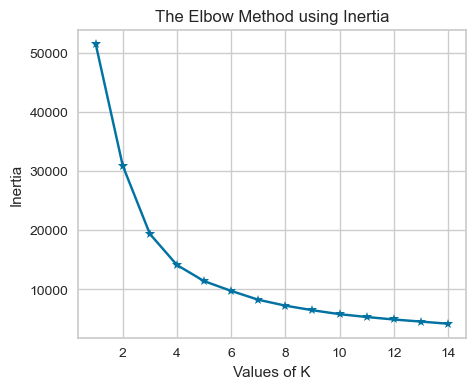

In [25]:
plt.figure(figsize=(5,4))
plt.plot(range(1,15),inertia,'b*-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

##### So after 4th point gradual decrease of values slows down... 
     
  Means 4 Clusters should be made 

# Model Building



In [26]:
kmeans_model=KMeans(n_clusters=4)
kmeans_model.fit_predict(df1)
pca_df_kmeans=pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_df_kmeans

,pca1,pca2,cluster
0,-2.286552,3.003717,2
1,1.134710,0.431993,0
2,-1.458107,-1.493142,1
3,0.740699,-0.539119,0
4,0.648372,-1.076997,0
...,...,...,...
6461,1.941392,-1.030060,0
6462,0.489226,-2.199348,0
6463,-0.146907,-2.372489,0
6464,-0.677272,-2.305845,0


#### Visualizing the Clusters

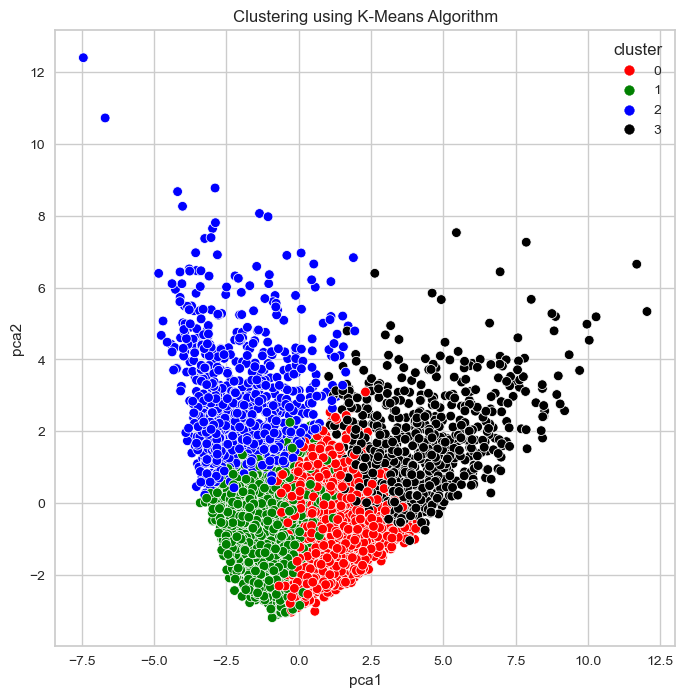

In [27]:
plt.figure(figsize=(8,8))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

## Analyzing The Cluster output

In [28]:
kmeans_model.cluster_centers_.shape

(4, 17)

In [30]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
# inverse transfor the data
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,740.793385,0.935137,890.918984,300.986622,590.225503,152.733691,0.856769,0.215691,0.707485,0.033466,0.589744,18.274162,3884.625371,1030.049988,592.519682,0.284746,11.721400
1,1145.211917,0.863380,287.141185,237.832799,49.579522,506.031396,0.174580,0.103492,0.069855,0.106540,1.862679,3.180963,3193.384750,899.877240,611.566213,0.059561,11.563958
2,2885.365579,0.957852,312.528191,206.697276,105.865054,3133.108132,0.237162,0.116255,0.137551,0.457868,12.178958,5.162242,5107.538512,1860.962403,1251.275019,0.031274,11.159292
3,1568.682530,0.975267,3361.222490,2180.915688,1181.157392,291.583864,0.922523,0.678336,0.681864,0.053625,1.070773,49.104849,6053.604194,2831.505559,730.864281,0.268698,11.871560


In [31]:
# create a column as "cluster" & store the respective cluster name that they belongs to
creditcard_cluster_df = pd.concat([df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
creditcard_cluster_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0.0


## Outcome

 So here we have 4 clusters:
 
 First Customers cluster (Transactors): Those are customers who pay least amount of interest charges and careful with their money, Cluster with lowest balance (104 Dollar) and cash advance (303 Dollar), Percentage of full payment = 23%

Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance (5000 Dollar)   and cash advance (5000 Dollar), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)

Third customer cluster (VIP/Prime): high credit limit 16K Dollar and highest percentage of full payment, target for increase credit limit and increase spending habits

Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance

### Analysis of Each Cluster

In [32]:
cluster_1=creditcard_cluster_df[creditcard_cluster_df['cluster']==0]
cluster_1.sort_values(by=['BALANCE'],ascending=False)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
138,19043.13856,1.0,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.0,12,0.0
5488,16304.88925,1.0,1770.57,0.00,1770.57,7424.094447,0.500000,0.000000,0.416667,0.666667,13,9,19000.0,5337.961195,8345.641905,0.0,12,0.0
5281,16115.59640,1.0,684.74,105.30,579.44,4354.002428,1.000000,0.083333,1.000000,0.583333,15,15,18000.0,3546.061550,5743.736444,0.0,12,0.0
585,15244.74865,1.0,7823.74,7564.81,258.93,2621.049473,1.000000,1.000000,1.000000,0.083333,2,62,19000.0,11123.409180,4467.520244,0.0,12,0.0
883,14581.45914,1.0,0.00,0.00,0.00,22665.778500,0.000000,0.000000,0.000000,0.833333,30,0,18500.0,20941.325510,5433.759888,0.0,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5763,0.00000,0.0,1021.56,0.00,1021.56,0.000000,1.000000,0.000000,1.000000,0.000000,0,36,3000.0,0.000000,312.343947,0.0,12,0.0
6263,0.00000,0.0,408.38,0.00,408.38,0.000000,0.833333,0.000000,0.750000,0.000000,0,13,6000.0,535.013917,312.343947,0.0,12,0.0
6271,0.00000,0.0,140.04,0.00,140.04,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1000.0,129.905883,312.343947,0.0,12,0.0
4937,0.00000,0.0,265.76,0.00,265.76,0.000000,0.916667,0.000000,0.916667,0.000000,0,11,1500.0,288.141157,14.094123,0.0,12,0.0


In [33]:
cluster_2=creditcard_cluster_df[creditcard_cluster_df['cluster']==1]
cluster_2.sort_values(by=['BALANCE'],ascending=False)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4140,18495.55855,1.0,5288.28,3657.30,1630.98,0.000000,1.000000,0.583333,1.000000,0.000000,0,76,22000.0,4246.168346,4227.081580,0.0,12,1.0
520,15258.22590,1.0,529.30,529.30,0.00,4100.891579,0.500000,0.500000,0.000000,1.000000,23,10,19000.0,2051.146470,3905.740148,0.0,8,1.0
4708,15155.53286,1.0,717.24,717.24,0.00,4718.274895,1.000000,1.000000,0.000000,0.500000,7,24,18000.0,4002.194556,3843.924668,0.0,12,1.0
5913,13777.37772,1.0,0.00,0.00,0.00,1675.249576,0.000000,0.000000,0.000000,0.666667,11,0,14500.0,3054.844697,3242.471295,0.0,12,1.0
153,13673.07961,1.0,9792.23,3959.81,5832.42,2444.445738,1.000000,0.750000,1.000000,0.750000,26,216,20000.0,11717.307940,6042.391629,0.0,12,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2630,0.00000,0.0,1090.69,815.70,274.99,0.000000,0.500000,0.166667,0.416667,0.000000,0,17,1800.0,0.000000,312.343947,0.0,12,1.0
6052,0.00000,0.0,0.00,0.00,0.00,72.388903,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,197.845282,312.343947,0.0,12,1.0
4781,0.00000,0.0,581.00,0.00,581.00,0.000000,0.583333,0.000000,0.583333,0.000000,0,7,1000.0,692.523718,312.343947,0.0,12,1.0
3748,0.00000,0.0,990.00,0.00,990.00,0.000000,0.818182,0.000000,0.818182,0.000000,0,9,1500.0,0.000000,312.343947,0.0,11,1.0


In [34]:
cluster_3=creditcard_cluster_df[creditcard_cluster_df['cluster']==2]
cluster_3.sort_values(by=['BALANCE'],ascending=False)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2361,15532.33972,1.0,1168.75,0.0,1168.75,3183.037625,0.916667,0.000000,0.916667,0.250000,5,11,16500.0,3906.738592,3379.593046,0.0,12,2.0
124,14224.11541,1.0,0.00,0.0,0.00,4614.427403,0.000000,0.000000,0.000000,0.333333,9,0,19000.0,3066.614272,3406.258999,0.0,12,2.0
4089,13968.47957,1.0,281.71,8.9,272.81,2710.679764,0.416667,0.083333,0.333333,0.666667,12,9,18500.0,3464.441992,3360.086085,0.0,12,2.0
723,13774.74154,1.0,404.24,0.0,404.24,3369.474535,0.250000,0.000000,0.250000,0.500000,7,3,14500.0,3167.870886,3533.464800,0.0,12,2.0
380,12474.72954,1.0,136.88,0.0,136.88,515.147607,0.166667,0.000000,0.166667,0.166667,2,2,14000.0,3519.008859,3430.627754,0.0,12,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5138,0.00000,0.0,120.00,0.0,120.00,0.000000,0.333333,0.000000,0.333333,0.000000,0,4,4000.0,140.890144,312.343947,0.0,12,2.0
5107,0.00000,0.0,0.00,0.0,0.00,465.571691,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,6112.512276,312.343947,0.0,12,2.0
4401,0.00000,0.0,18.77,0.0,18.77,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,5000.0,0.000000,312.343947,0.0,12,2.0
1574,0.00000,0.0,2600.00,2600.0,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,6000.0,2437.260081,49.283603,0.0,12,2.0


In [35]:
cluster_4=creditcard_cluster_df[creditcard_cluster_df['cluster']==3]
cluster_4.sort_values(by=['BALANCE'],ascending=False)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
501,13479.28821,1.0,41050.40,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.750680,15914.484620,0.083333,12,3.0
495,12478.17286,1.0,174.00,174.00,0.00,3269.418821,0.250000,0.250000,0.000000,0.666667,21,3,14000.0,3251.190662,3872.099498,0.000000,12,3.0
866,11654.55492,1.0,463.00,74.00,389.00,3096.807933,0.583333,0.083333,0.416667,0.416667,17,7,12500.0,3024.609470,5148.045052,0.000000,12,3.0
3210,10871.08518,1.0,0.00,0.00,0.00,4822.559803,0.000000,0.000000,0.000000,0.166667,3,0,18000.0,2735.624602,2595.765441,0.000000,12,3.0
755,10397.09989,1.0,0.00,0.00,0.00,4045.620171,0.000000,0.000000,0.000000,0.250000,6,0,13000.0,3222.169406,2818.707479,0.000000,12,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,0.00000,0.0,176.03,176.03,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,7000.0,0.000000,312.343947,0.000000,8,3.0
1131,0.00000,0.0,12.65,0.00,12.65,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,5000.0,0.000000,312.343947,0.000000,12,3.0
3235,0.00000,0.0,103.68,103.68,0.00,0.000000,0.111111,0.111111,0.000000,0.000000,0,1,2500.0,230.652819,312.343947,0.000000,9,3.0
3459,0.00000,0.0,125.37,0.00,125.37,0.000000,1.000000,0.000000,1.000000,0.000000,0,7,1500.0,0.000000,312.343947,0.000000,7,3.0


## Saving The model

In [36]:
# Saving the dataframe 
creditcard_cluster_df.to_csv('Clustering_data_of_Customer.csv')